In [17]:
from collections import Counter

In [15]:
from sklearn.cluster import KMeans

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [11]:
def RGBtoHEx(rgb):
    hex="#{:02x}{:02x}{:02x}".format(int(rgb[0]),int(rgb[1]),int(rgb[2]))
    return hex
print(RGBtoHEx([255,0,0]))

#ff0000


In [32]:
def PlotImageInformation(path,k=10):
    # loading a image and convert it in to RGB format
    ImageBGR=cv2.imread(path)
    ImageRGB=cv2.cvtColor(ImageBGR,cv2.COLOR_BGR2RGB)
    
    #Resize the image to speed up the processing
    ResizeImageRGB=cv2.resize(ImageRGB,(64,64),interpolation=cv2.INTER_AREA)
    
    #reshape the image to be a list of pixels
    ImageList=ResizeImageRGB.reshape((ResizeImageRGB.shape[0]*ResizeImageRGB.shape[1],3))
    
    #Cluster pixels and assign lables
    clt=KMeans(n_clusters=k)
    labels=clt.fit_predict(ImageList)
    
    #count the labels to find most popular 
    LablesCount=Counter(labels)
    TotalCount=sum(LablesCount.values())
    
    #subset out the most popular centroid
    CenterColors=list(clt.cluster_centers_)
    OrderedColors=[CenterColors[i]/255 for i in LablesCount.keys()]
    ColorLabels=[RGBtoHEx(OrderedColors[i]*255) for i in LablesCount.keys()]
    
    
    #plotting
    plt.figure(figsize=(14, 8))
    plt.subplot(221)
    plt.imshow(ImageRGB)
    plt.axis('off')
    
    plt.subplot(222)
    plt.pie(LablesCount.values(),labels=ColorLabels,colors=OrderedColors,startangle=90)
    plt.axis('equal')
    plt.show()
    
    
    

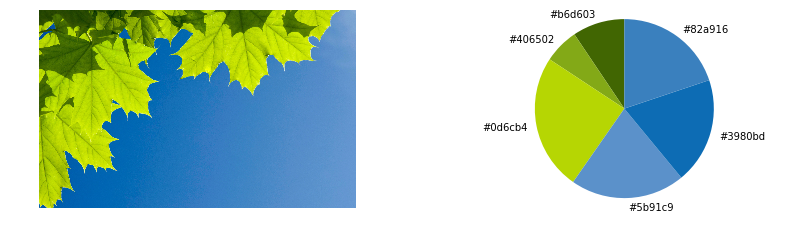

In [27]:
PlotImageInformation("C:/Users/kavindu/Pictures/New folder (3)/p1.jpg")

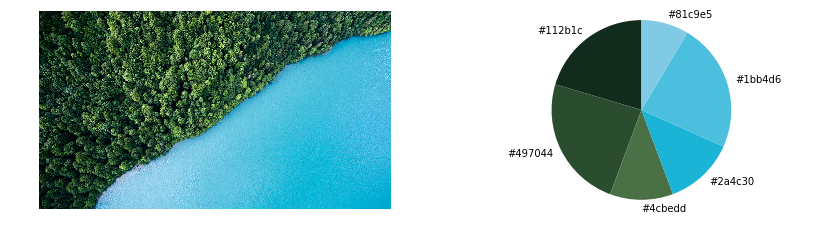

In [28]:
PlotImageInformation("C:/Users/kavindu/Pictures/New folder (3)/p2.jpg")

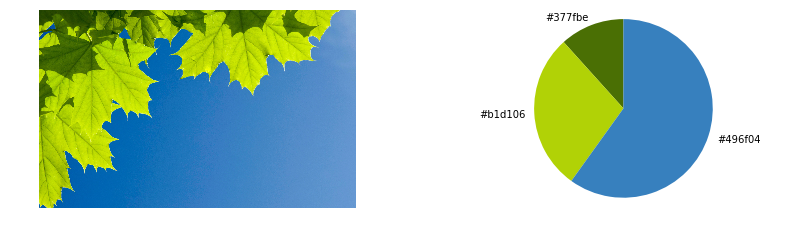

In [31]:
PlotImageInformation("C:/Users/kavindu/Pictures/New folder (3)/p1.jpg")

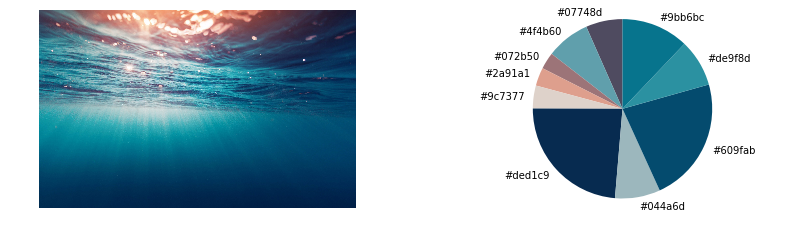

In [33]:
PlotImageInformation("C:/Users/kavindu/Pictures/New folder (3)/underwater-sea-ad.jpg")